# Assignment Week 4 - The Battle of Neighborhoods

## Table of Content

* [1. Introduction](###-1.-Introduction)
* [2. Data](###-2.-Data)
* [2. Methodology and analysis](###-2.-Data)
* [2. Results and discussion](###-2.-Data)
* [5. Conclusion](###-2.-Data)

 


### 1. Introduction 

Melbourne is a large city of the Victoria state in Australia with a population of more than 5 million. Due to the diversity of people living in Australia and especially in Melbourne, there are various types of cuisine available. There is a high competition between restaurants in the suburbs with a high concentration of food stores and restaurants.  Therefore, it is crucial to investigate the suitability of different suburbs for opening a new restaurant to reduce the risk of investment failure and financial loss. 

**Problem description**\
Recently, a client who is going to open a restaurant in Melbourne asked us to introduce the best place for opening his restaurant. For this purpose, we need to analyse the number of restaurants in each desired suburb to find the best one. This project therefore aims to find the best place for a restaurant in Melbourne, Australia. Since the restaurant is going to be open until late night, the client has concerns about the crime in the suburb in which restaurants is located. As there is a trade-off between the crime rate and the suitability of a suburb for a restaurant, at the end of this project the followings are delivered to provide an insight into different options for our client: 

1. Our recommended list of top 3 suburbs for opening the restaurant.
2. Crime data and number of restaurants in these suburbs.
3. A geographical map of these suburbs.

----
### 2. Data

For this project, we need to first obtain the geographical data of all suburbs along with their postcode. This requires the following packages to be imported.

In [1]:
import pandas as pd
import numpy as np
%pip install lxml html5lib beautifulsoup4
%pip install requests
import requests
from bs4 import BeautifulSoup

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


---- 
### Geographical data
The postcode data of various suburbs of Melbourne along with their latitude and longitude are available in the following `url`. We create a BeautifulSoup object to webscrapping the data.

In [2]:
url="https://www.matthewproctor.com/full_australian_postcodes_vic"
page=requests.get(url)
soup = BeautifulSoup(page.content, 'lxml')

----
Now, let's extract the table data from that and save them in a dataframe `df`.

In [3]:
table1=soup.find("table",attrs={"class":"table"})

row=table1.find_all('tr')
cols=[v.text.replace('\n','') for v in row[0].find_all('td')]

df=pd.DataFrame(columns=cols)
for i in range(1,len(row)):
    tds=row[i].find_all('td')
    vals=[td.text.replace('\n','') for td in tds]
    df=df.append(pd.Series(vals,index=cols),ignore_index=True)

df.head()

,ID,Postcode,Locality,State,Longitude,Latitude,Category,Type,SA3,SA3 Name,SA4,SA4 Name,Region,Status
0,4746,3000,MELBOURNE,VIC,144.956776,-37.817403,Delivery Area,Delivery Area,20604,Melbourne City,206,Melbourne - Inner,R1,Updated 6-Feb-2020
1,4747,3001,MELBOURNE,VIC,144.76592,-38.365017,Post Office Boxes,Post Office Boxes,20605,Port Phillip,206,Melbourne - Inner,R1,Updated 25-Mar-2020 SA3
2,4748,3002,EAST MELBOURNE,VIC,144.982207,-37.818517,Delivery Area,Delivery Area,20604,Melbourne City,206,Melbourne - Inner,R1,Updated 6-Feb-2020
3,4749,3003,WEST MELBOURNE,VIC,144.949592,-37.810871,Delivery Area,Delivery Area,20604,Melbourne City,206,Melbourne - Inner,R1,Updated 6-Feb-2020
4,4750,3004,MELBOURNE,VIC,144.970161,-37.844246,Delivery Area,Delivery Area,20605,Port Phillip,206,Melbourne - Inner,R1,Updated 6-Feb-2020


----
Let's drop those columns that we don't need for this project.

In [4]:
df.drop(['ID','State','Category','Type','SA3','SA4','SA4 Name', 'Region','Status'],axis=1,inplace=True)
df.rename(columns={'Locality':'Suburb','SA3 Name':'Neighborhood'},inplace=True)

We need to clean the data more before using that for this project. The following code will do this.

In [5]:
df['Suburb']=df['Suburb'].str.replace(" ","_")
df['Suburb']=df['Suburb'].str.pad(10, side ='right', fillchar =' ')
dfnew=df[df["Longitude"] != ""]
dfnew=dfnew[dfnew['Longitude']!='0']
dfnew[['Longitude','Latitude']]=dfnew[['Longitude','Latitude']].astype('float')
df_grouped=dfnew.groupby(['Postcode']).agg({'Longitude':'mean', 'Latitude':'mean','Suburb':'sum'})

In [6]:

df_grouped.reset_index(inplace=True)
#df_grouped['Suburb']=df_grouped['Suburb'].str.replace(" ",",")
df_grouped.head()

,Postcode,Longitude,Latitude,Suburb
0,3000,144.956776,-37.817403,MELBOURNE
1,3001,144.765920,-38.365017,MELBOURNE
2,3002,144.982207,-37.818517,EAST_MELBOURNE
3,3003,144.949592,-37.810871,WEST_MELBOURNE
4,3004,144.970161,-37.844246,MELBOURNE ST_KILDA_ROAD_CENTRAL


----
### Crime data
Now, let's collect the data for the crimes in different suburbs. This data is publicly available at the "https://www.crimestatistics.vic.gov.au/crime-statistics/latest-crime-data/download-data". I already downloaded the .csv file and saved the data as a new dataframe.

In [7]:
df_crime=pd.read_csv("C:/Users/mnaemi/Google Drive/Data Science/Capstone/crime.csv")
df_crime.head()

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded
0,2019,December,Alpine,3691,Dederang,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1
1,2019,December,Alpine,3691,Dederang,E Justice procedures offences,E10 Justice procedures,E14 Pervert the course of justice or commit pe...,1
2,2019,December,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,1
3,2019,December,Alpine,3691,Dederang,D Public order and security offences,D20 Disorderly and offensive conduct,D22 Drunk and disorderly in public,2
4,2019,December,Alpine,3691,Dederang,B Property and deception offences,B20 Property damage,B21 Criminal damage,1


Let's drop unnecessary columns.

In [8]:
df_crime.drop(['Year','Year ending','Local Government Area','Suburb/Town Name','Offence Subdivision','Offence Subgroup'],axis=1,inplace=True)
df_crime.rename(columns={'Suburb/Town Name':'Suburb','Offence Division':'Type'},inplace=True)
df_crime.head()



,Postcode,Type,Incidents Recorded
0,3691,B Property and deception offences,1
1,3691,E Justice procedures offences,1
2,3691,A Crimes against the person,1
3,3691,D Public order and security offences,2
4,3691,B Property and deception offences,1


----
Now, we group the data based on the postcode to get the total number of crimes in each region.

In [9]:
df_crime['Incidents Recorded']=df_crime['Incidents Recorded'].astype('string')
df_crime['Incidents Recorded']=df_crime['Incidents Recorded'].str.replace(',','')
df_crime[['Incidents Recorded','Postcode']]=df_crime[['Incidents Recorded','Postcode']].astype('int64')

df_crime=df_crime.groupby(['Postcode']).sum()

In [10]:
df_crime

,Incidents Recorded
Postcode,
3000,148273
3002,7572
3003,6812
3004,7453
3005,671
...,...
3990,50
3991,283
3992,288


----
Now, let's merge two dataframe using their postcode.

In [11]:
df_grouped['Postcode']=df_grouped['Postcode'].astype('int64')
df_main=df_grouped.merge(df_crime,on='Postcode')
df_main1=df_main[['Postcode','Suburb','Longitude','Latitude','Incidents Recorded']]

In [12]:
df_main1.head()

,Postcode,Suburb,Longitude,Latitude,Incidents Recorded
0,3000,MELBOURNE,144.956776,-37.817403,148273
1,3002,EAST_MELBOURNE,144.982207,-37.818517,7572
2,3003,WEST_MELBOURNE,144.949592,-37.810871,6812
3,3004,MELBOURNE ST_KILDA_ROAD_CENTRAL,144.970161,-37.844246,7453
4,3005,WORLD_TRADE_CENTRE,144.950858,-37.824608,671


----
### Foursquare data

Now, we use the foursquare to get the information about the restaurants in Melboune suburbs. First, we need to use our client id and secret for calling Foursquare API.

In [13]:
CLIENT_ID = 'VHKUTYEQ1M5PALROLDQCNEELUV5FUXPLNJAOPO0MWFCCOCTU' # your Foursquare ID
CLIENT_SECRET = 'W0YKRNXEMWDR5WPEMZHP53XRD24ZM3FF4SICPK2KSR25BKIH' # your Foursquare Secret3
cat_id='4d4b7105d754a06374d81259' # food venues id
neighborhood_latitude=-37.817403
neighborhood_longitude=144.956776
VERSION = '20180604'
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius


----
The following function get the venues in a suburb and return them.

In [14]:
def getNearbyVenues(names, postcode, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name,post, lat, lng in zip(names,postcode, latitudes, longitudes):
#        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            cat_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            post,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 'Postcode',
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

----
Let's explore each postcode to find the venues in each of them and make a dataframe for that.

In [180]:
df_100=df_main1.head(20)
Melb_venues = getNearbyVenues(names=df_100['Suburb'],
                              postcode=df_main1['Postcode'],
                                   latitudes=df_main1['Latitude'],
                                   longitudes=df_main1['Longitude']
                                  )

Now, we need to first find the number of restaurants for each suburb using the `groupby` and `count` command. Then, we merge the resultant dataframe to the crime datafram to get `Melb_venues_crimes`.

In [215]:
restaurants=Melb_venues
del Melb_venues_crimes
restaurants=restaurants.groupby(['Suburb','Latitude','Longitude','Postcode'],as_index=False)['Venue'].count()
restaurants.rename(columns={'Venue':'No Restaurants'},inplace=True)
Melb_venues_crimes=restaurants.merge(df_100, left_index=True, right_index=False, how='outer',on=['Postcode','Suburb','Longitude','Latitude'])
Melb_venues_crimes=Melb_venues_crimes.fillna(0)
Melb_venues_crimes = Melb_venues_crimes.astype({"No Restaurants": int})
Melb_venues_crimes

,Suburb,Latitude,Longitude,Postcode,No Restaurants,Incidents Recorded
16,ALBANVALE KEALBA KINGS_PARKST_ALBANS,-37.743361,144.796693,3021,12,37309
15,ALBION GLENGALA SUNSHINE SUNSHINE_NORTHSU...,-37.777204,144.829945,3020,12,47594
13,ALTONA SEAHOLME,-37.861720,144.812736,3018,5,7096
17,ARDEER DEER_PARK_EAST,-37.795937,144.793961,3022,1,3682
14,BRAYBROOK BRAYBROOK_NORTHROBINSON,-37.784683,144.854014,3019,3,9498
6,DOCKLANDS,-37.814719,144.948039,3008,61,15308
1,EAST_MELBOURNE,-37.818517,144.982207,3002,14,7572
8,FOOTSCRAY SEDDON SEDDON_WEST,-37.807101,144.907953,3011,4,25150
0,MELBOURNE,-37.817403,144.956776,3000,70,148273
3,MELBOURNE ST_KILDA_ROAD_CENTRAL,-37.844246,144.970161,3004,4,7453


----
### 3. Methodology and Analysis

Let's look at some of the statisitical information of the suburbs using `describe`.

In [216]:
Melb_venues_crimes.describe()

,Latitude,Longitude,Postcode,No Restaurants,Incidents Recorded
count,20.000000,20.000000,20.000000,20.00000,20.000000
mean,-37.814150,144.877041,3012.600000,17.50000,21297.200000
std,0.031102,0.096603,7.639234,20.83393,32405.368154
min,-37.863743,144.580165,3000.000000,0.00000,671.000000
25%,-37.828016,144.825643,3005.750000,3.00000,7084.250000
50%,-37.814451,144.888574,3012.500000,9.00000,9581.500000
75%,-37.796098,144.952337,3019.250000,26.00000,24556.000000
max,-37.743361,144.982207,3024.000000,70.00000,148273.000000


Now, let's plot visulaize the data to draw some insight from that. First, we look at the histogram of the number of crime for all studied suburbs. We can see that Postcode=3000 has significantly higher number of crimes.

Text(0, 0.5, 'Number of Crimes')

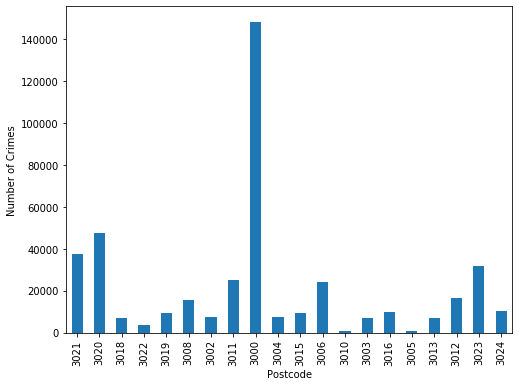

In [217]:
import matplotlib.pyplot as plt
Melb_venues_crimes.set_index('Postcode',inplace=True)
Melb_venues_crimes[['Incidents Recorded']].plot(kind='bar',figsize=(8, 6),legend=None)
plt.ylabel('Number of Crimes')

Then, we look ath the histogram of the number of restaurants for all studied suburbs. Interestingly, Postcode=3012 does not have any restaurant. It might be  a good suburb for openning the restaurant but we need to do more investigration before drawing conclusions.

Text(0, 0.5, 'Number of Restaurants')

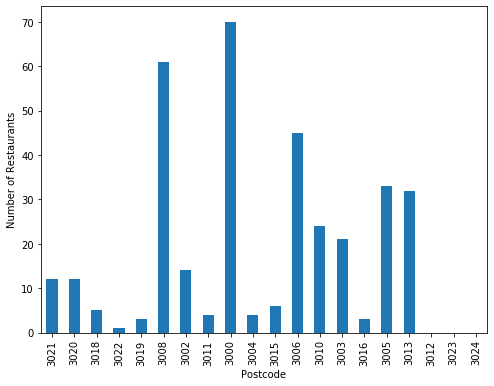

In [218]:
#Melb_venues_crimes.set_index('Postcode',inplace=True)
Melb_venues_crimes[['No Restaurants']].plot(kind='bar',figsize=(8, 6),legend=None)
plt.ylabel('Number of Restaurants')

----
To compare the results side by side and as percentages, which gives better idea of the data we use the pie chart to plot number of restaurant and crimes for different stuided suburbs.

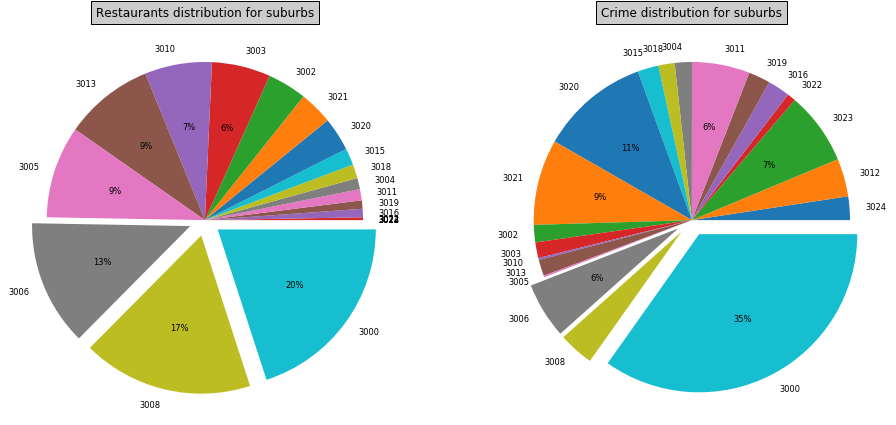

In [219]:
Melb_venues_crimes.reset_index(inplace=True)
Melb_venues_crimes.sort_values(by=['No Restaurants'],inplace=True)
def autopct_more_than_5(pct):
    return ('%1.f%%' % pct) if pct > 5 else ''
explode=np.zeros(Melb_venues_crimes.shape[0])
explode[-3:-1]=.1 
explode[-1]=.1
plt.subplot(221)
plt.pie(Melb_venues_crimes['No Restaurants'],autopct=autopct_more_than_5,explode=explode,textprops={'size': 'smaller'},labels=Melb_venues_crimes['Postcode'])
plt.title('Restaurants distribution for suburbs', bbox={'facecolor':'0.8', 'pad':5})
plt.subplot(222)
plt.pie(Melb_venues_crimes['Incidents Recorded'],autopct=autopct_more_than_5,explode=explode,textprops={'size': 'smaller'},labels=Melb_venues_crimes['Postcode'])
plt.title('Crime distribution for suburbs', bbox={'facecolor':'0.8', 'pad':5})

fig = plt.gcf()
fig.set_size_inches(16,16)

----
Finally, we use the scatter plot of the number of crimes versus number of restaurants for all suburbs that we studied. This graph gives us useful information about the suburbs and the possible number of clusters for clustering of the suburbs, about which we explain in the next section.

Text(0.5, 1.0, 'Crime vs No. of restaurants')

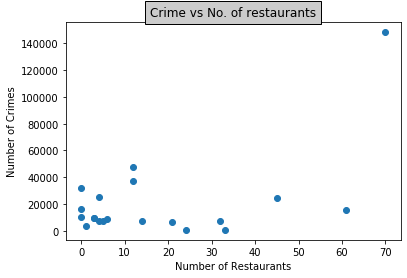

In [220]:
plt.scatter(Melb_venues_crimes['No Restaurants'].values,Melb_venues_crimes['Incidents Recorded'].values)
plt.xlabel('Number of Restaurants')
plt.ylabel('Number of Crimes')
plt.title('Crime vs No. of restaurants', bbox={'facecolor':'0.8', 'pad':5})


----
### Clustering

Now, we need to cluster the suburbs to find those which have similar features and put them in a same group. We need to first drop unnecessary cloumns from `Melb_venues_crimes` dataframe and then standardise its data. We use the K-means method here which is an unsupervised method to cluster these suburbs. We need to first determine the optimal number of clusters using the elbow method.

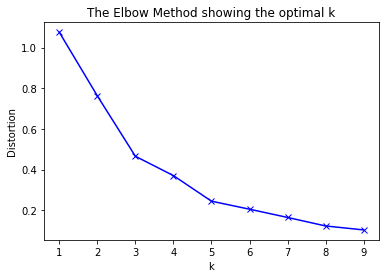

In [221]:
# set number of clusters
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

Melb_venues_clusters = Melb_venues_crimes.drop(['Suburb','Postcode','Latitude','Longitude'], 1)
Melb_venues_clusters=StandardScaler().fit_transform(Melb_venues_clusters)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=0).fit(Melb_venues_clusters)
    distortions.append(sum(np.min(cdist(Melb_venues_clusters, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Melb_venues_clusters.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



The above figure shows that the optimal number of clusters for this problem is 5. Therefore, we develop a k-means clustering model using k=5.

In [222]:
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Melb_venues_clusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 4, 1, 4, 4, 4, 1, 4, 4, 4])

Let's add the cluster labels to the data frame.

In [223]:
# add clustering labels
Melb_venues_crimes.insert(0, 'Cluster Labels', kmeans.labels_)
Melb_venues_crimes.sort_index()

,Cluster Labels,Postcode,Suburb,Latitude,Longitude,No Restaurants,Incidents Recorded
0,1,3021,ALBANVALE KEALBA KINGS_PARKST_ALBANS,-37.743361,144.796693,12,37309
1,1,3020,ALBION GLENGALA SUNSHINE SUNSHINE_NORTHSU...,-37.777204,144.829945,12,47594
2,4,3018,ALTONA SEAHOLME,-37.861720,144.812736,5,7096
3,4,3022,ARDEER DEER_PARK_EAST,-37.795937,144.793961,1,3682
4,4,3019,BRAYBROOK BRAYBROOK_NORTHROBINSON,-37.784683,144.854014,3,9498
5,0,3008,DOCKLANDS,-37.814719,144.948039,61,15308
6,4,3002,EAST_MELBOURNE,-37.818517,144.982207,14,7572
7,1,3011,FOOTSCRAY SEDDON SEDDON_WEST,-37.807101,144.907953,4,25150
8,2,3000,MELBOURNE,-37.817403,144.956776,70,148273
9,4,3004,MELBOURNE ST_KILDA_ROAD_CENTRAL,-37.844246,144.970161,4,7453


### 4. Result and discussion

###  Visualizing

In previous sections, we analysed the data and clustered the suburbs according to their features using K-means method. Now, we should visualise the suburb clusters on a geographical map to find the best place for the restaurant. First, we need to obtain the latitude and longitude of Melbourne.

In [91]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Melbourne'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Melbourne are {}, {}.'.format(latitude, longitude))

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::openssl-1.1.1d-he774522_4done

# All requested packages already installed.

The geograpical coordinate of Melbourne are -37.8142176, 144.9631608.


----
We use folium to show the suburb clusters and their labels. We first visualise the cluster using the number of restaurants of each suburb to plot circles on the map.

In [224]:
# create map
import folium
import matplotlib.cm as cm 
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
#x = np.arange(kclusters)
#ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.jet(np.linspace(0, 1, kclusters))
colors_array=['red','magenta','blue','yellow','black']
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,crime,noRes in zip(Melb_venues_crimes['Latitude'], Melb_venues_crimes['Longitude'], Melb_venues_crimes['Postcode'], Melb_venues_crimes['Cluster Labels'],Melb_venues_crimes['Incidents Recorded'],Melb_venues_crimes['No Restaurants']):
    label = folium.Popup('Postcode:'+str(poi) + ', No Restaurants: '+str(noRes)+' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=max(4,noRes/5),
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        weight= 2,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

We now visualise the clusters on the geographical map of Melbourne to see where suburbs are located and how they are clustered. Figure 8 shows the Melbourne suburbs clusters as circles. Each colour represents one cluster and the radius of circles is approximately proportional to the number of restaurants. We can clearly see that the cluster 1 (black) and 0 (purple) are close to each other which have high number of restaurants. Cluster 3 (blue) has relatively high number of restaurants. Cluster 2 (red) and 4 (yellow) have lower number of restaurants.

In [226]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
#x = np.arange(kclusters)
#ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.jet(np.linspace(0, 1, kclusters))
colors_array=['red','magenta','blue','yellow','black']
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,crime,noRes in zip(Melb_venues_crimes['Latitude'], Melb_venues_crimes['Longitude'], Melb_venues_crimes['Postcode'], Melb_venues_crimes['Cluster Labels'],Melb_venues_crimes['Incidents Recorded'],Melb_venues_crimes['No Restaurants']):
    label = folium.Popup('Postcode:'+str(poi) + ', No Crimes: '+str(crime)+' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=max(4,crime/4000),
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cluster 4 which is the best cluster for opening the new restaurant is shown in yellow which are scattered form east to west of the map. Now, let’s look at the above map which shows the Melbourne suburbs clustering. In this figure the radius of circles is approximately proportional to their number of crimes. Now, the difference between cluster 2 (red) and 4 (yellow), having low number of restaurants, is more distinct. Comparison of these clusters show that the cluster 2 (red) has higher crime rate. Cluster 3 (blue) also has lower crime rate but the previous map indicated that this cluster has a high number of restaurants which makes the competition for the new restaurant more difficult.

----
The following table shows all suburbs in cluster 4. Our desired suburb is in this cluster so, we need to first compare the suburbs in this table. Considering tge crime data and the number of restaurants in the suburbs, the top 3 subrubs are those with postcode 3022,3004,3018.

In [242]:
Best_suburb=Melb_venues_crimes[Melb_venues_crimes['Cluster Labels']==4]
Best_suburb

,Cluster Labels,Postcode,Suburb,Latitude,Longitude,No Restaurants,Incidents Recorded
19,4,3024,FIELDSTONEMAMBOURIN MANOR_LAKESMOUNT_COTTRELLW...,-37.863403,144.580165,0,10275
17,4,3012,BROOKLYN KINGSVILLEKINGSVILLE_WESTMAIDSTONE T...,-37.807135,144.861162,0,16537
3,4,3022,ARDEER DEER_PARK_EAST,-37.795937,144.793961,1,3682
14,4,3016,WILLIAMSTOWNWILLIAMSTOWN_NORTH,-37.863743,144.888461,3,9665
4,4,3019,BRAYBROOK BRAYBROOK_NORTHROBINSON,-37.784683,144.854014,3,9498
9,4,3004,MELBOURNE ST_KILDA_ROAD_CENTRAL,-37.844246,144.970161,4,7453
2,4,3018,ALTONA SEAHOLME,-37.861720,144.812736,5,7096
10,4,3015,NEWPORT SOUTH_KINGSVILLESPOTSWOOD,-37.838242,144.880556,6,9118
6,4,3002,EAST_MELBOURNE,-37.818517,144.982207,14,7572


----
Now let's plot these best suburbs on a map to indicate their location. This helps our client to better decide on the location of his restaurant.

In [295]:
Best_suburb=Best_suburb[Best_suburb['Postcode'].isin([3022,3004,3018])]
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
from folium.features import DivIcon

markers_colors = []
for lat, lon, poi,  in zip(Best_suburb['Latitude'], Best_suburb['Longitude'], Best_suburb['Postcode']):
    label = folium.Popup('Postcode:'+str(poi), parse_html=True )
    folium.CircleMarker(
        [lat, lon],
        radius=max(4,noRes/5),
        popup=label,
        color='black',
        fill=True,
        fill_color='yellow',
        weight= 2,
        fill_opacity=0.7).add_to(map_clusters)
    folium.map.Marker(
    [lat, lon],
    icon=DivIcon(
        icon_size=(0,0),
        icon_anchor=(-10,0),
        html='<div  style="font-size:14pt; color:blue" >%s</div>' % str(poi),
        )
    ).add_to(map_clusters)
        
       
map_clusters

### 5. Conclusion

This project aimed to find the top 3 suburbs for opening a new restaurant considering the number of restaurants in the suburbs and their crime rate. We first obtained the data from various sources and clean them to prepare the final dataset required for this project. After analysing various suburbs, we cluster them based on their crime data and their number of restaurants into 5 different clusters. We found that one of the clusters has lower number of competitors and also have a relatively low number of crimes. Various suburbs belonged to this cluster, among which we selected the top 3 of them to the client. These suburbs include postcode `3022`, `3004` and `3018`. We summarised the crime data and number of restaurants for these suburbs that showed some pros and cons in their relative suitability for the new restaurant. Finally, we plotted these top 3 suburbs on Melbourne's geographical map. this provides information about the location of these suburbs and help the client to choose the best one.

## Thanks for reviewing. :)